In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv("C:/Users/khush/Downloads/amazonv1/amazon_delivery.csv")


# Convert Order Date, Order Time, Pickup Time, Delivery Time to datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Order_Time'] = pd.to_datetime(df['Order_Time'])
df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time'])
df['Delivery_Time'] = pd.to_datetime(df['Delivery_Time'])

# Calculate Delivery Duration in minutes (optional)
df['Delivery_Duration'] = (df['Delivery_Time'] - df['Order_Time']).dt.total_seconds() / 60

# Handle missing values (you can choose to fill or drop rows based on your preference)
df = df.dropna()

# Feature Engineering: Extracting day of the week, month, and weekday
df['Order_Day_of_Week'] = df['Order_Date'].dt.dayofweek
df['Order_Month'] = df['Order_Date'].dt.month
df['Order_Year'] = df['Order_Date'].dt.year

# Optional: Define whether it's a holiday (based on your dataset or using external data)
# Example: df['Is_Holiday'] = df['Order_Date'].isin(holidays_list)


C:\Users\khush\AppData\Local\Temp\ipykernel_21540\435357163.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order_Time'] = pd.to_datetime(df['Order_Time'])


DateParseError: Unknown datetime string format, unable to parse: NaN , at position 174

In [5]:
# Drop rows where 'Order_Time' is missing
df = df.dropna(subset=['Order_Time'])

# Then convert the column to datetime format
df['Order_Time'] = pd.to_datetime(df['Order_Time'], errors='coerce')


C:\Users\khush\AppData\Local\Temp\ipykernel_21540\3104166199.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order_Time'] = pd.to_datetime(df['Order_Time'], errors='coerce')


In [7]:
# Inspect the first few rows of the 'Order_Time' column
print(df['Order_Time'].head(10))


0   2025-04-01 11:30:00
1   2025-04-01 19:45:00
2   2025-04-01 08:30:00
3   2025-04-01 18:00:00
4   2025-04-01 13:30:00
5   2025-04-01 21:20:00
6   2025-04-01 19:15:00
7   2025-04-01 17:25:00
8   2025-04-01 20:55:00
9   2025-04-01 21:55:00
Name: Order_Time, dtype: datetime64[ns]


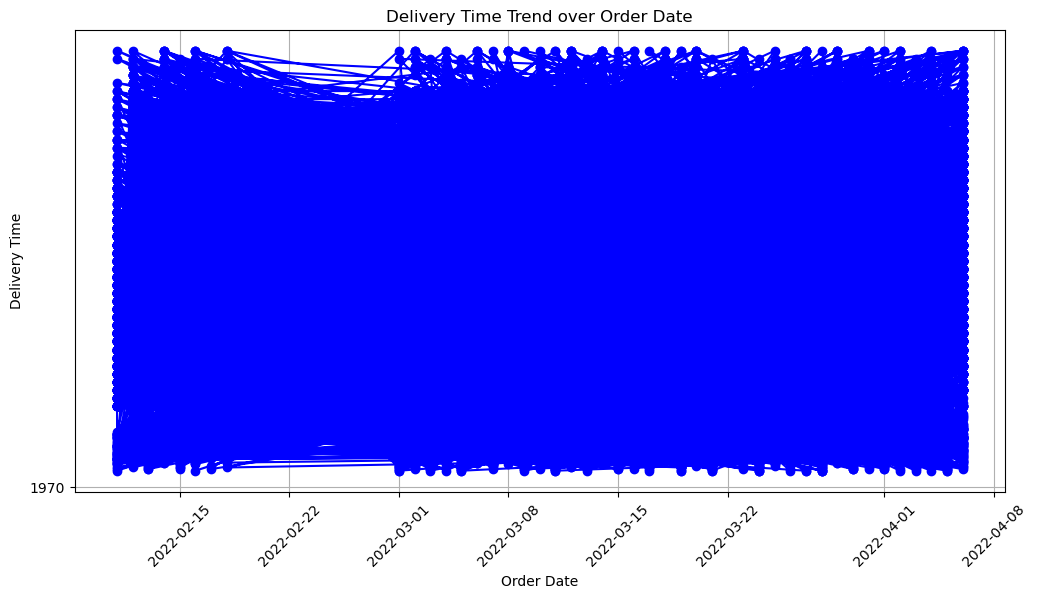

In [9]:
import matplotlib.pyplot as plt

# Convert Delivery Time to datetime if not already in correct format
df['Delivery_Time'] = pd.to_datetime(df['Delivery_Time'], errors='coerce')

# Plot Delivery Time over time
plt.figure(figsize=(12, 6))
plt.plot(df['Order_Date'], df['Delivery_Time'], marker='o', linestyle='-', color='b')
plt.title('Delivery Time Trend over Order Date')
plt.xlabel('Order Date')
plt.ylabel('Delivery Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


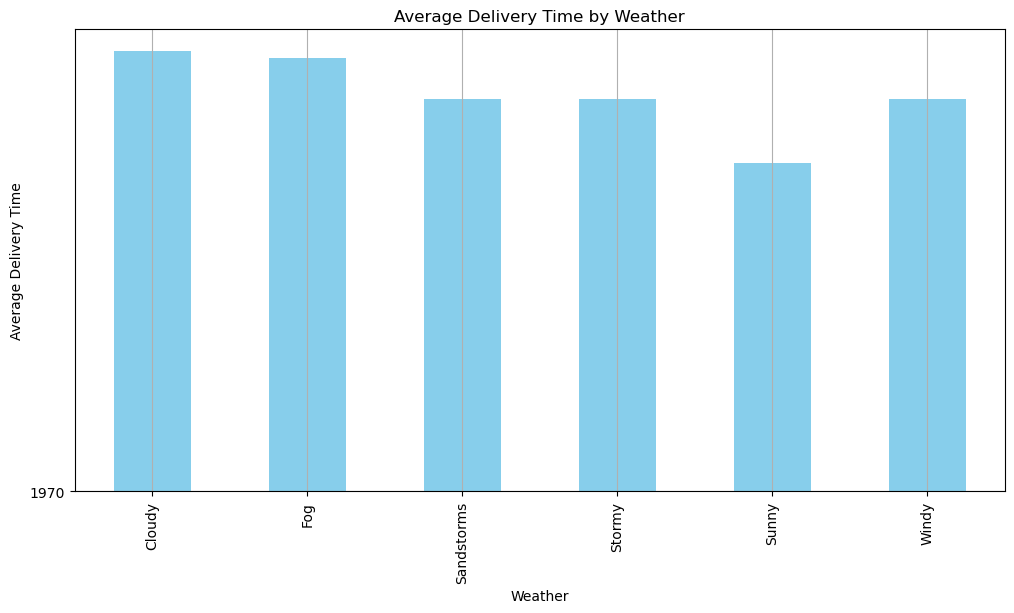

In [11]:
# Plot Delivery Time by Weather
plt.figure(figsize=(12, 6))
df.groupby('Weather')['Delivery_Time'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Delivery Time by Weather')
plt.xlabel('Weather')
plt.ylabel('Average Delivery Time')
plt.grid(True)
plt.show()


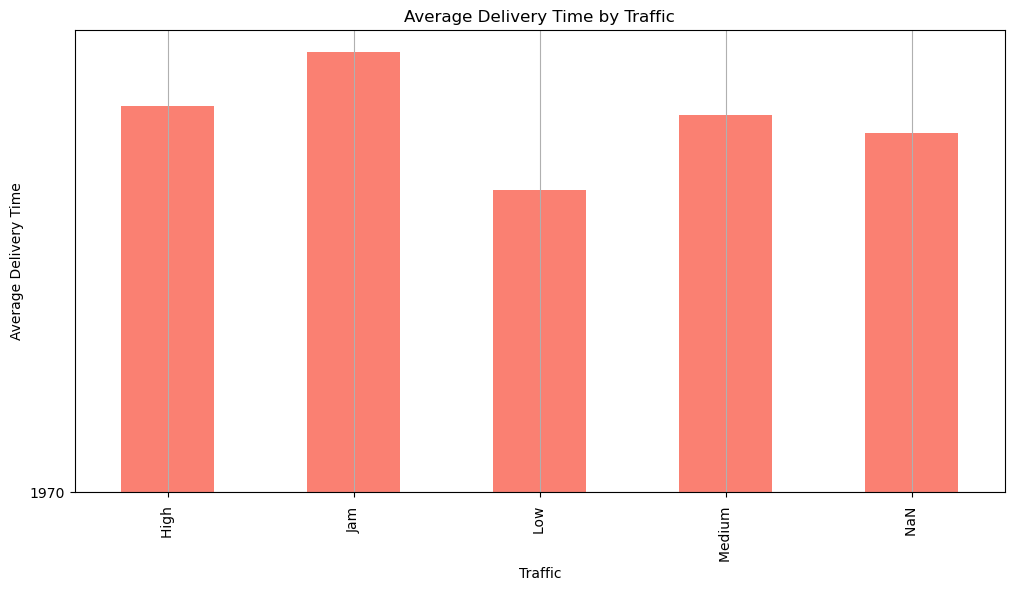

In [13]:
# Plot Delivery Time by Traffic
plt.figure(figsize=(12, 6))
df.groupby('Traffic')['Delivery_Time'].mean().plot(kind='bar', color='salmon')
plt.title('Average Delivery Time by Traffic')
plt.xlabel('Traffic')
plt.ylabel('Average Delivery Time')
plt.grid(True)
plt.show()


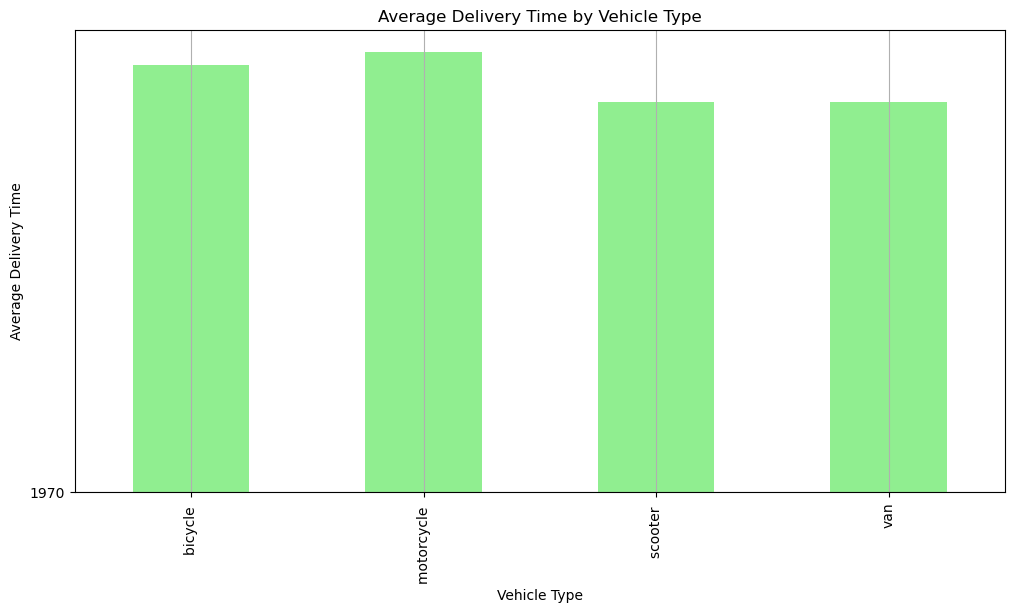

In [15]:
# Plot Delivery Time by Vehicle Type
plt.figure(figsize=(12, 6))
df.groupby('Vehicle')['Delivery_Time'].mean().plot(kind='bar', color='lightgreen')
plt.title('Average Delivery Time by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Delivery Time')
plt.grid(True)
plt.show()


In [17]:
# Plot correlations
correlation_matrix = df[['Order_Time', 'Pickup_Time', 'Delivery_Time', 'Traffic', 'Weather', 'Vehicle']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


ValueError: could not convert string to float: '11:45:00'

In [19]:
# Calculate time differences between Order_Time and Delivery_Time in minutes
df['Delivery_Time_diff'] = (df['Delivery_Time'] - df['Order_Time']).dt.total_seconds() / 60

# Check the new column
df[['Order_Time', 'Delivery_Time', 'Delivery_Time_diff']].head()


,Order_Time,Delivery_Time,Delivery_Time_diff
0,2025-04-01 11:30:00,1970-01-01 00:00:00.000000120,-29058450.0
1,2025-04-01 19:45:00,1970-01-01 00:00:00.000000165,-29058945.0
2,2025-04-01 08:30:00,1970-01-01 00:00:00.000000130,-29058270.0
3,2025-04-01 18:00:00,1970-01-01 00:00:00.000000105,-29058840.0
4,2025-04-01 13:30:00,1970-01-01 00:00:00.000000150,-29058570.0


In [21]:
# One-hot encode categorical columns: Weather, Traffic, Vehicle
df_encoded = pd.get_dummies(df, columns=['Weather', 'Traffic', 'Vehicle'])

# Check the encoded dataframe
df_encoded.head()


,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,...,Weather_Windy,Traffic_High,Traffic_Jam,Traffic_Low,Traffic_Medium,Traffic_NaN,Vehicle_bicycle,Vehicle_motorcycle,Vehicle_scooter,Vehicle_van
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2025-04-01 11:30:00,11:45:00,...,False,True,False,False,False,False,False,True,False,False
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2025-04-01 19:45:00,19:50:00,...,False,False,True,False,False,False,False,False,True,False
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2025-04-01 08:30:00,08:45:00,...,False,False,False,True,False,False,False,True,False,False
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,2025-04-01 18:00:00,18:10:00,...,False,False,False,False,True,False,False,True,False,False
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2025-04-01 13:30:00,13:45:00,...,False,True,False,False,False,False,False,False,True,False


In [23]:
# Calculate the correlation matrix on the numeric columns
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


ValueError: could not convert string to float: 'ialx566343618'

In [25]:
# Check data types of all columns
print(df_encoded.dtypes)

# List of columns that are not numeric
non_numeric_cols = df_encoded.select_dtypes(exclude=[np.number]).columns
print(non_numeric_cols)


Order_ID                       object
Agent_Age                       int64
Agent_Rating                  float64
Store_Latitude                float64
Store_Longitude               float64
Drop_Latitude                 float64
Drop_Longitude                float64
Order_Date             datetime64[ns]
Order_Time             datetime64[ns]
Pickup_Time                    object
Area                           object
Delivery_Time          datetime64[ns]
Category                       object
Delivery_Time_diff            float64
Weather_Cloudy                   bool
Weather_Fog                      bool
Weather_Sandstorms               bool
Weather_Stormy                   bool
Weather_Sunny                    bool
Weather_Windy                    bool
Traffic_High                     bool
Traffic_Jam                      bool
Traffic_Low                      bool
Traffic_Medium                   bool
Traffic_NaN                      bool
Vehicle_bicycle                  bool
Vehicle_moto

NameError: name 'np' is not defined

In [27]:
import numpy as np

# Check data types of all columns
print(df_encoded.dtypes)

# List of columns that are not numeric
non_numeric_cols = df_encoded.select_dtypes(exclude=[np.number]).columns
print(non_numeric_cols)


Order_ID                       object
Agent_Age                       int64
Agent_Rating                  float64
Store_Latitude                float64
Store_Longitude               float64
Drop_Latitude                 float64
Drop_Longitude                float64
Order_Date             datetime64[ns]
Order_Time             datetime64[ns]
Pickup_Time                    object
Area                           object
Delivery_Time          datetime64[ns]
Category                       object
Delivery_Time_diff            float64
Weather_Cloudy                   bool
Weather_Fog                      bool
Weather_Sandstorms               bool
Weather_Stormy                   bool
Weather_Sunny                    bool
Weather_Windy                    bool
Traffic_High                     bool
Traffic_Jam                      bool
Traffic_Low                      bool
Traffic_Medium                   bool
Traffic_NaN                      bool
Vehicle_bicycle                  bool
Vehicle_moto

In [29]:
# Strip spaces from column names
df_encoded.columns = df_encoded.columns.str.strip()



In [31]:
# Encoding categorical columns using one-hot encoding
df_encoded = pd.get_dummies(df_encoded, columns=['Area', 'Category', 
                                                  'Weather_Cloudy', 'Weather_Fog', 
                                                  'Weather_Sandstorms', 'Weather_Stormy', 
                                                  'Weather_Sunny', 'Weather_Windy', 
                                                  'Traffic_High', 'Traffic_Jam', 
                                                  'Traffic_Low', 'Traffic_Medium', 
                                                  'Traffic_NaN', 'Vehicle_bicycle', 
                                                  'Vehicle_motorcycle', 'Vehicle_scooter', 
                                                  'Vehicle_van'], drop_first=True)

# Check the updated dataframe
print(df_encoded.head())


        Order_ID  Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude  \
0  ialx566343618         37           4.9       22.745049        75.892471   
1  akqg208421122         34           4.5       12.913041        77.683237   
2  njpu434582536         23           4.4       12.914264        77.678400   
3  rjto796129700         38           4.7       11.003669        76.976494   
4  zguw716275638         32           4.6       12.972793        80.249982   

   Drop_Latitude  Drop_Longitude Order_Date          Order_Time Pickup_Time  \
0      22.765049       75.912471 2022-03-19 2025-04-01 11:30:00    11:45:00   
1      13.043041       77.813237 2022-03-25 2025-04-01 19:45:00    19:50:00   
2      12.924264       77.688400 2022-03-19 2025-04-01 08:30:00    08:45:00   
3      11.053669       77.026494 2022-04-05 2025-04-01 18:00:00    18:10:00   
4      13.012793       80.289982 2022-03-26 2025-04-01 13:30:00    13:45:00   

   ... Weather_Windy_True  Traffic_High_True  Traffic_Ja

In [33]:
# Drop Order_ID if it's not needed
df_encoded = df_encoded.drop(columns=['Order_ID'])


In [35]:
# Check for missing values
print(df_encoded.isnull().sum())


Agent_Age                   0
Agent_Rating               54
Store_Latitude              0
Store_Longitude             0
Drop_Latitude               0
Drop_Longitude              0
Order_Date                  0
Order_Time                 91
Pickup_Time                 0
Delivery_Time               0
Delivery_Time_diff         91
Area_Other                  0
Area_Semi-Urban             0
Area_Urban                  0
Category_Books              0
Category_Clothing           0
Category_Cosmetics          0
Category_Electronics        0
Category_Grocery            0
Category_Home               0
Category_Jewelry            0
Category_Kitchen            0
Category_Outdoors           0
Category_Pet Supplies       0
Category_Shoes              0
Category_Skincare           0
Category_Snacks             0
Category_Sports             0
Category_Toys               0
Weather_Cloudy_True         0
Weather_Fog_True            0
Weather_Sandstorms_True     0
Weather_Stormy_True         0
Weather_Su

In [37]:
# Fill missing Agent_Rating with the median
df_encoded['Agent_Rating'].fillna(df_encoded['Agent_Rating'].median(), inplace=True)


C:\Users\khush\AppData\Local\Temp\ipykernel_21540\3880756799.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_encoded['Agent_Rating'].fillna(df_encoded['Agent_Rating'].median(), inplace=True)


In [39]:
# Fill missing Agent_Rating with the median (without using inplace)
df_encoded['Agent_Rating'] = df_encoded['Agent_Rating'].fillna(df_encoded['Agent_Rating'].median())

# Fill missing Order_Time with forward fill (without using inplace)
df_encoded['Order_Time'] = df_encoded['Order_Time'].fillna(method='ffill')

# Fill missing Delivery_Time_diff with the median (without using inplace)
df_encoded['Delivery_Time_diff'] = df_encoded['Delivery_Time_diff'].fillna(df_encoded['Delivery_Time_diff'].median())


C:\Users\khush\AppData\Local\Temp\ipykernel_21540\2003546891.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_encoded['Order_Time'] = df_encoded['Order_Time'].fillna(method='ffill')


In [41]:
# Fill missing Agent_Rating with the median (without using inplace)
df_encoded['Agent_Rating'] = df_encoded['Agent_Rating'].fillna(df_encoded['Agent_Rating'].median())

# Fill missing Order_Time with forward fill using .ffill() method
df_encoded['Order_Time'] = df_encoded['Order_Time'].ffill()

# Fill missing Delivery_Time_diff with the median (without using inplace)
df_encoded['Delivery_Time_diff'] = df_encoded['Delivery_Time_diff'].fillna(df_encoded['Delivery_Time_diff'].median())


In [43]:
# Calculate the correlation matrix on the numeric columns
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: '11:45:00'

In [45]:
# Convert 'Order_Time' to timedelta in seconds
df_encoded['Order_Time'] = pd.to_datetime(df_encoded['Order_Time'], errors='coerce')
df_encoded['Order_Time'] = (df_encoded['Order_Time'] - pd.to_datetime('00:00:00')).dt.total_seconds()

# If you have other time columns (like Pickup_Time or Delivery_Time) that need conversion:
df_encoded['Pickup_Time'] = pd.to_datetime(df_encoded['Pickup_Time'], errors='coerce')
df_encoded['Pickup_Time'] = (df_encoded['Pickup_Time'] - pd.to_datetime('00:00:00')).dt.total_seconds()

df_encoded['Delivery_Time'] = pd.to_datetime(df_encoded['Delivery_Time'], errors='coerce')
df_encoded['Delivery_Time'] = (df_encoded['Delivery_Time'] - pd.to_datetime('00:00:00')).dt.total_seconds()

# Now calculate the correlation matrix on the numeric columns
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


C:\Users\khush\AppData\Local\Temp\ipykernel_21540\861323020.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_encoded['Pickup_Time'] = pd.to_datetime(df_encoded['Pickup_Time'], errors='coerce')


NameError: name 'sns' is not defined

<Figure size 1200x800 with 0 Axes>

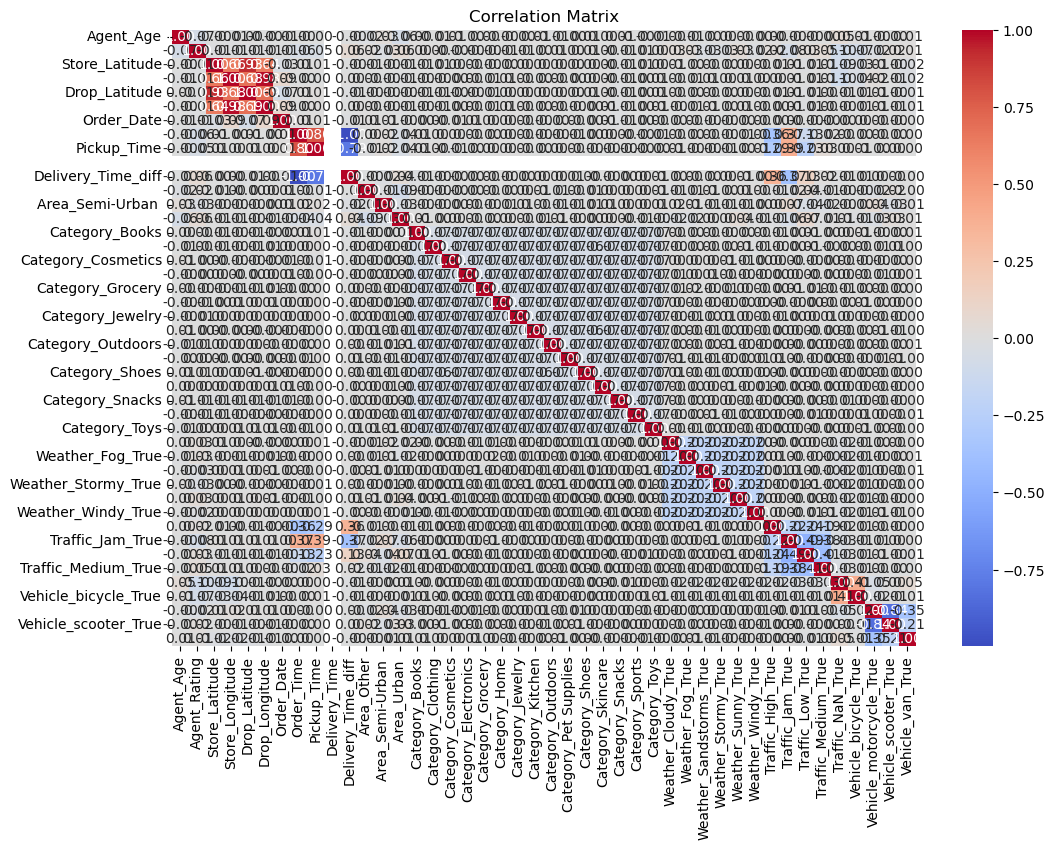

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Order_Time' to timedelta in seconds
df_encoded['Order_Time'] = pd.to_datetime(df_encoded['Order_Time'], errors='coerce')
df_encoded['Order_Time'] = (df_encoded['Order_Time'] - pd.to_datetime('00:00:00')).dt.total_seconds()

# If you have other time columns (like Pickup_Time or Delivery_Time) that need conversion:
df_encoded['Pickup_Time'] = pd.to_datetime(df_encoded['Pickup_Time'], errors='coerce')
df_encoded['Pickup_Time'] = (df_encoded['Pickup_Time'] - pd.to_datetime('00:00:00')).dt.total_seconds()

df_encoded['Delivery_Time'] = pd.to_datetime(df_encoded['Delivery_Time'], errors='coerce')
df_encoded['Delivery_Time'] = (df_encoded['Delivery_Time'] - pd.to_datetime('00:00:00')).dt.total_seconds()

# Now calculate the correlation matrix on the numeric columns
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


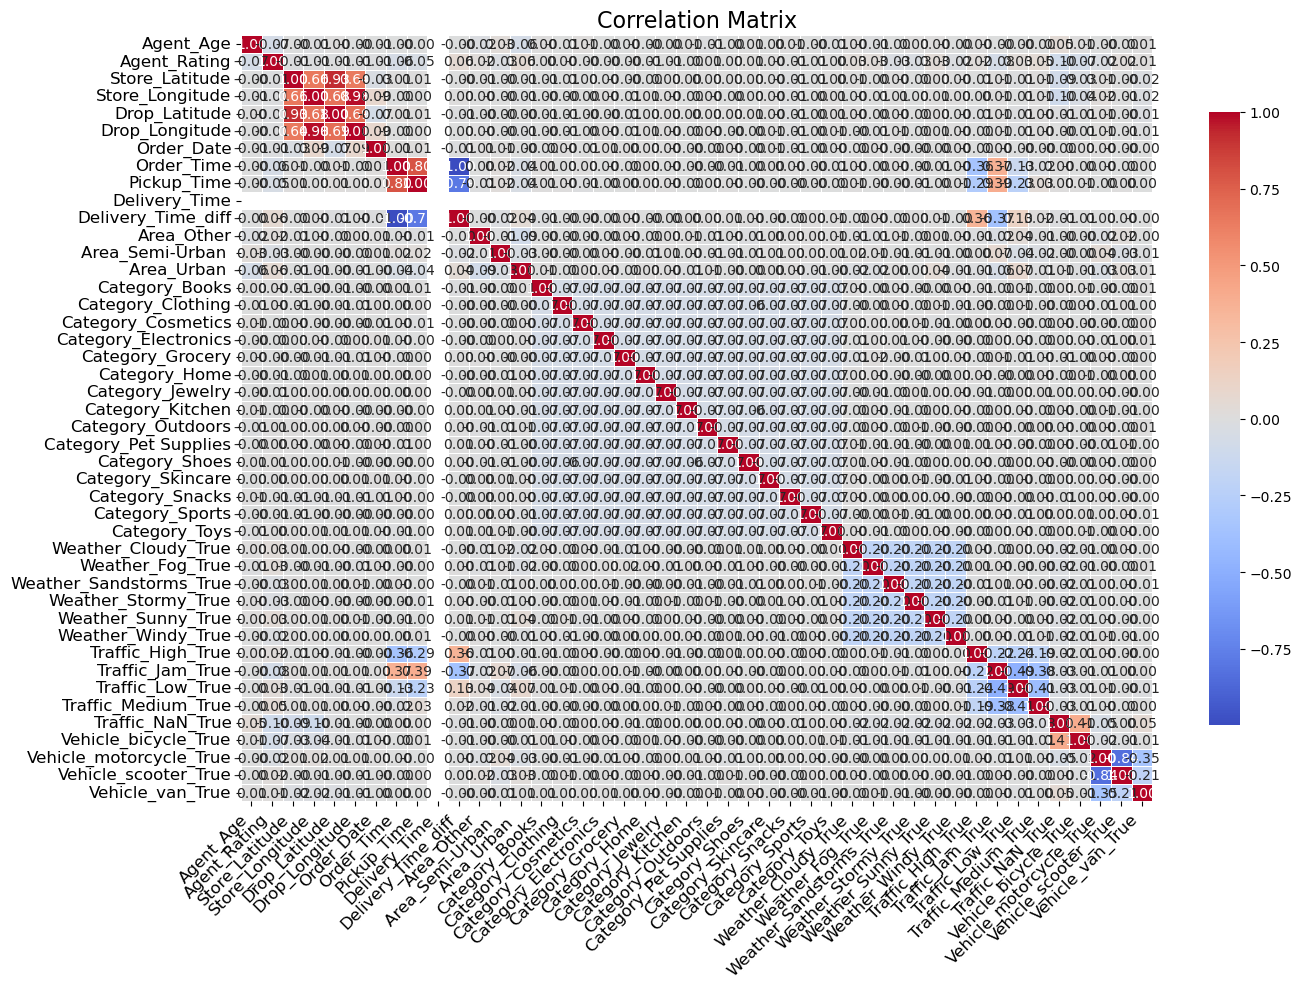

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the figure with a larger size
plt.figure(figsize=(14, 10))

# Plot the heatmap with better formatting
sns.heatmap(
    correlation_matrix,          # The correlation matrix
    annot=True,                  # Annotate each cell with the numeric value
    cmap='coolwarm',             # Color map for heatmap
    fmt='.2f',                   # Format numbers to 2 decimal places
    annot_kws={'size': 10},       # Font size for annotations
    linewidths=0.5,              # Linewidth between cells
    cbar_kws={'shrink': 0.8},    # Colorbar size adjustment
)

# Rotate axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Title for the heatmap
plt.title("Correlation Matrix", fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


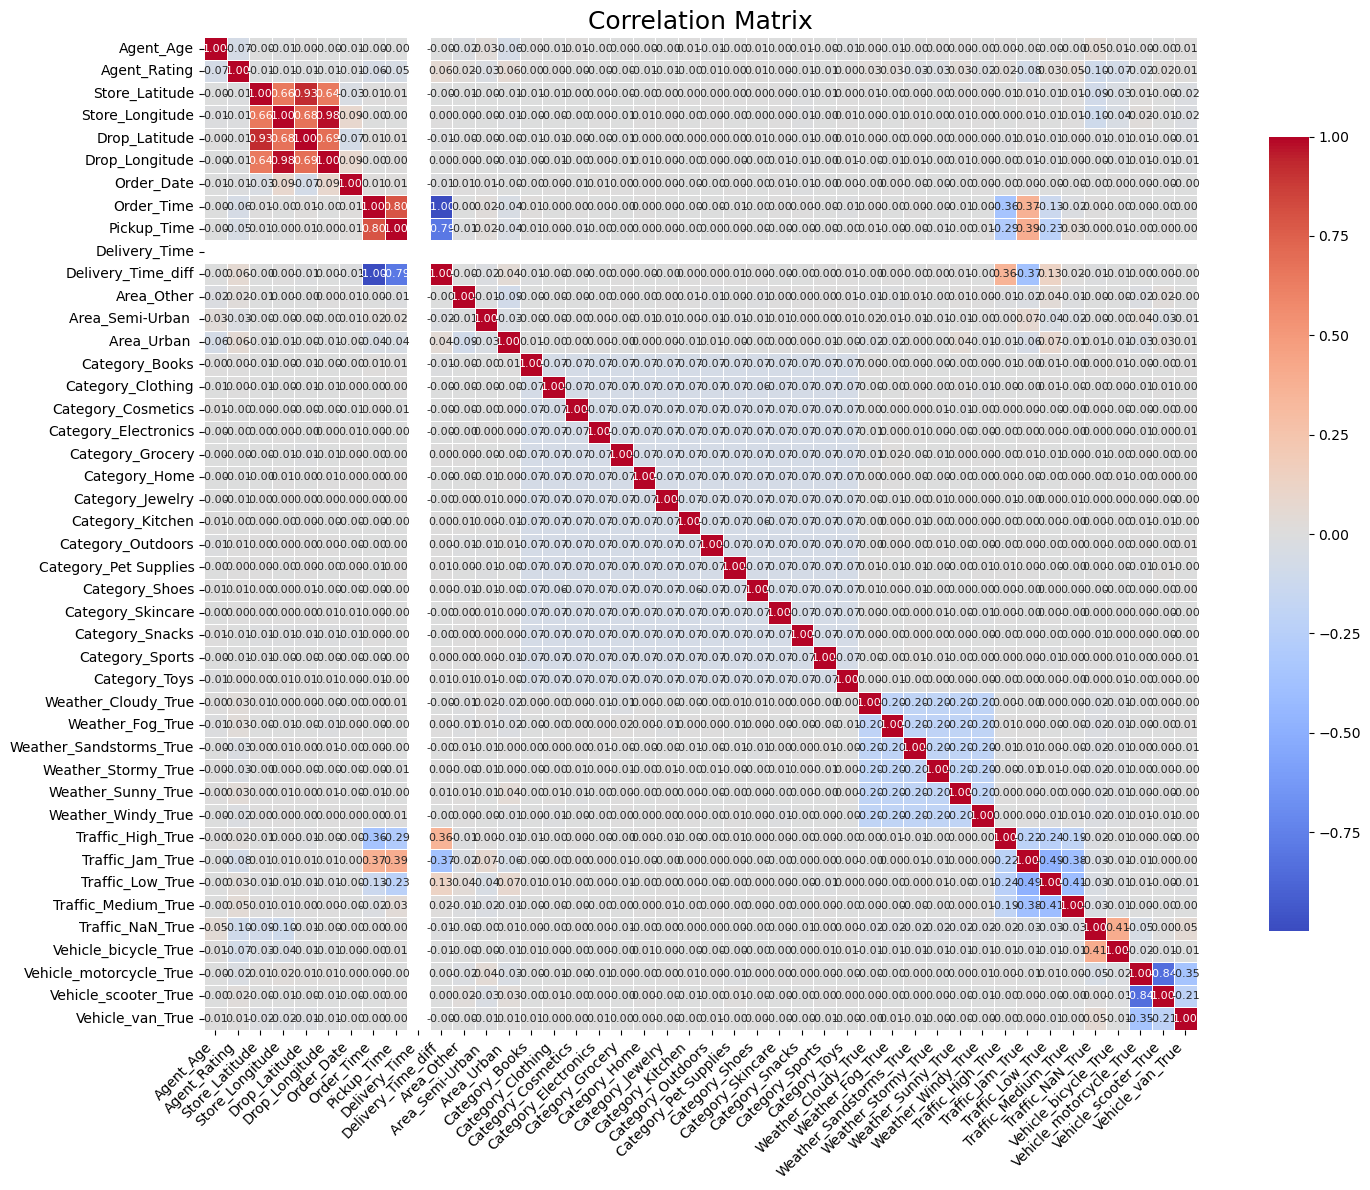

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Increase the size of the figure to accommodate the full heatmap and labels
plt.figure(figsize=(16, 12))

# Plot the heatmap with better formatting
sns.heatmap(
    correlation_matrix,          # The correlation matrix
    annot=True,                  # Annotate each cell with the numeric value
    cmap='coolwarm',             # Color map for heatmap
    fmt='.2f',                   # Format numbers to 2 decimal places
    annot_kws={'size': 8},       # Font size for annotations
    linewidths=0.5,              # Linewidth between cells
    cbar_kws={'shrink': 0.8},    # Colorbar size adjustment
    square=True,                # Square grid for better symmetry
)

# Rotate the x-axis labels and adjust their position
plt.xticks(rotation=45, ha='right', fontsize=10)

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0, fontsize=10)

# Title for the heatmap with a larger font size
plt.title("Correlation Matrix", fontsize=18)

# Ensure tight layout for better spacing
plt.tight_layout()

# Show the plot with increased resolution
plt.show()


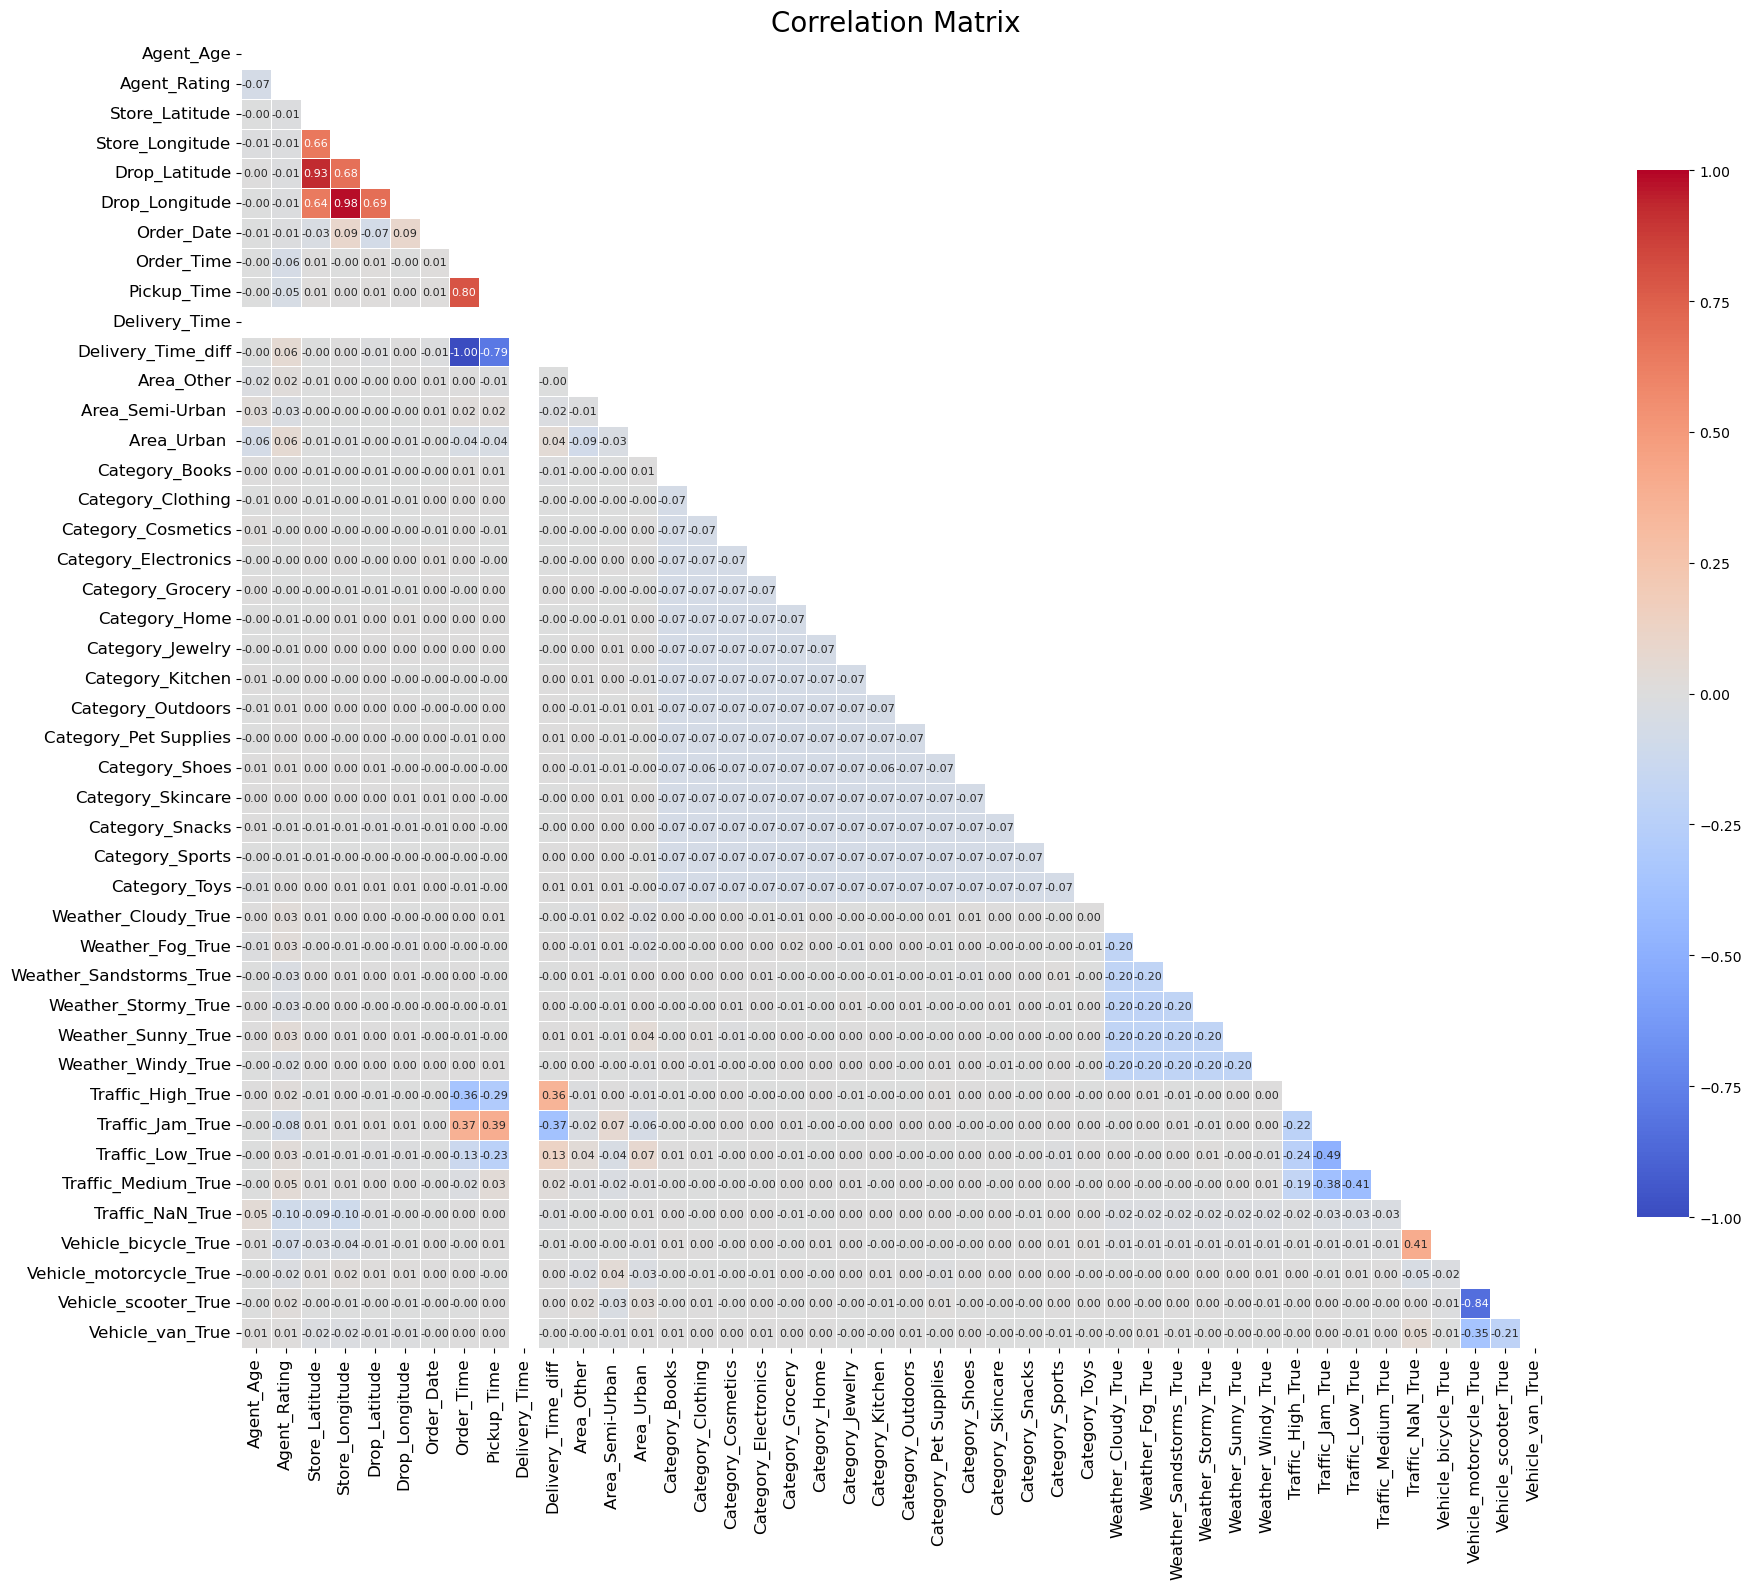

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Mask the upper triangle to avoid clutter if necessary
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Increase the size of the figure to accommodate the full heatmap and labels
plt.figure(figsize=(20, 16))

# Plot the heatmap with adjustments
sns.heatmap(
    correlation_matrix,          # The correlation matrix
    annot=True,                  # Annotate each cell with the numeric value
    cmap='coolwarm',             # Color map for heatmap
    fmt='.2f',                   # Format numbers to 2 decimal places
    annot_kws={'size': 8},       # Font size for annotations
    linewidths=0.5,              # Linewidth between cells
    cbar_kws={'shrink': 0.8},    # Colorbar size adjustment
    square=True,                # Square grid for better symmetry
    mask=mask,                  # Apply the mask to the upper triangle if needed
    vmin=-1, vmax=1             # Adjust color scale to be between -1 and 1 for better clarity
)

# Rotate the x-axis labels more to avoid overlap
plt.xticks(rotation=90, ha='center', fontsize=12)

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0, fontsize=12)

# Title for the heatmap with a larger font size
plt.title("Correlation Matrix", fontsize=20)

# Ensure tight layout for better spacing
plt.tight_layout()

# Show the plot with increased resolution
plt.show()


In [55]:
import pandas as pd

# Assuming 'df_encoded' is your DataFrame
correlation_matrix = df_encoded.corr()

# Display the correlation matrix as a table
correlation_matrix


,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Delivery_Time,...,Weather_Windy_True,Traffic_High_True,Traffic_Jam_True,Traffic_Low_True,Traffic_Medium_True,Traffic_NaN_True,Vehicle_bicycle_True,Vehicle_motorcycle_True,Vehicle_scooter_True,Vehicle_van_True
Agent_Age,1.000000,-0.067912,-0.004532,-0.009347,0.002489,-0.000495,-0.005296,-0.001065,-0.000925,NaN,...,-0.004706,0.003760,-0.001287,-0.001536,-0.004368,0.045679,0.005626,-0.001103,-0.003952,0.008430
Agent_Rating,-0.067912,1.000000,-0.007865,-0.014252,-0.010283,-0.013603,-0.012455,-0.058933,-0.048529,NaN,...,-0.021331,0.020514,-0.076348,0.029747,0.045913,-0.098520,-0.072010,-0.023168,0.021304,0.009880
Store_Latitude,-0.004532,-0.007865,1.000000,0.655086,0.926618,0.643916,-0.031706,0.005582,0.008420,NaN,...,0.003381,-0.005350,0.013941,-0.007558,0.006038,-0.085133,-0.031331,0.013997,-0.002880,-0.018147
Store_Longitude,-0.009347,-0.014252,0.655086,1.000000,0.679743,0.983280,0.087047,-0.002299,0.000184,NaN,...,0.003327,0.001159,0.009050,-0.005488,0.006330,-0.102153,-0.043785,0.018120,-0.005667,-0.019927
Drop_Latitude,0.002489,-0.010283,0.926618,0.679743,1.000000,0.690943,-0.072555,0.009305,0.011722,NaN,...,0.000961,-0.007342,0.012645,-0.010119,0.003682,-0.010062,-0.007873,0.012333,-0.003899,-0.014977
Drop_Longitude,-0.000495,-0.013603,0.643916,0.983280,0.690943,1.000000,0.087074,-0.000881,0.001273,NaN,...,0.001341,-0.000882,0.006571,-0.009234,0.004063,-0.003203,-0.007200,0.013647,-0.005797,-0.014114
Order_Date,-0.005296,-0.012455,-0.031706,0.087047,-0.072555,0.087074,1.000000,0.010864,0.010292,NaN,...,0.003054,-0.000246,0.003212,-0.002593,-0.000234,-0.001898,0.001756,0.002940,-0.001461,-0.002898
Order_Time,-0.001065,-0.058933,0.005582,-0.002299,0.009305,-0.000881,0.010864,1.000000,0.796823,NaN,...,0.001150,-0.355930,0.373028,-0.126748,-0.016707,0.003559,-0.000612,0.000104,-0.000786,0.001212
Pickup_Time,-0.000925,-0.048529,0.008420,0.000184,0.011722,0.001273,0.010292,0.796823,1.000000,NaN,...,0.006618,-0.291685,0.391944,-0.230116,0.032763,0.002507,0.005936,-0.003073,0.002438,0.000931
Delivery_Time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:

# Check basic info (data types, non-null counts)
print(df_encoded.info())

# Summary statistics for numeric columns
print(df_encoded.describe())


NameError: name 'df_encoded' is not defined

In [9]:
# Get the frequency of each categorical column
categorical_columns = df_encoded.select_dtypes(include=['object', 'bool']).columns

for col in categorical_columns:
    print(f"Summary of {col}:")
    print(df_encoded[col].value_counts())
    print("\n")


NameError: name 'df_encoded' is not defined

In [61]:
# Generate correlation summary
correlation_summary = df_encoded.corr()
print("Correlation Summary:")
print(correlation_summary)


Correlation Summary:
                         Agent_Age  Agent_Rating  Store_Latitude  \
Agent_Age                 1.000000     -0.067912       -0.004532   
Agent_Rating             -0.067912      1.000000       -0.007865   
Store_Latitude           -0.004532     -0.007865        1.000000   
Store_Longitude          -0.009347     -0.014252        0.655086   
Drop_Latitude             0.002489     -0.010283        0.926618   
Drop_Longitude           -0.000495     -0.013603        0.643916   
Order_Date               -0.005296     -0.012455       -0.031706   
Order_Time               -0.001065     -0.058933        0.005582   
Pickup_Time              -0.000925     -0.048529        0.008420   
Delivery_Time                  NaN           NaN             NaN   
Delivery_Time_diff       -0.000117      0.058641       -0.004756   
Area_Other               -0.021843      0.016901       -0.005416   
Area_Semi-Urban           0.030452     -0.025025       -0.003154   
Area_Urban               -0

In [63]:
# Missing data summary
missing_data = df_encoded.isnull().sum() / len(df_encoded) * 100
print("Missing Data Summary:")
print(missing_data)


Missing Data Summary:
Agent_Age                  0.0
Agent_Rating               0.0
Store_Latitude             0.0
Store_Longitude            0.0
Drop_Latitude              0.0
Drop_Longitude             0.0
Order_Date                 0.0
Order_Time                 0.0
Pickup_Time                0.0
Delivery_Time              0.0
Delivery_Time_diff         0.0
Area_Other                 0.0
Area_Semi-Urban            0.0
Area_Urban                 0.0
Category_Books             0.0
Category_Clothing          0.0
Category_Cosmetics         0.0
Category_Electronics       0.0
Category_Grocery           0.0
Category_Home              0.0
Category_Jewelry           0.0
Category_Kitchen           0.0
Category_Outdoors          0.0
Category_Pet Supplies      0.0
Category_Shoes             0.0
Category_Skincare          0.0
Category_Snacks            0.0
Category_Sports            0.0
Category_Toys              0.0
Weather_Cloudy_True        0.0
Weather_Fog_True           0.0
Weather_Sandstorm

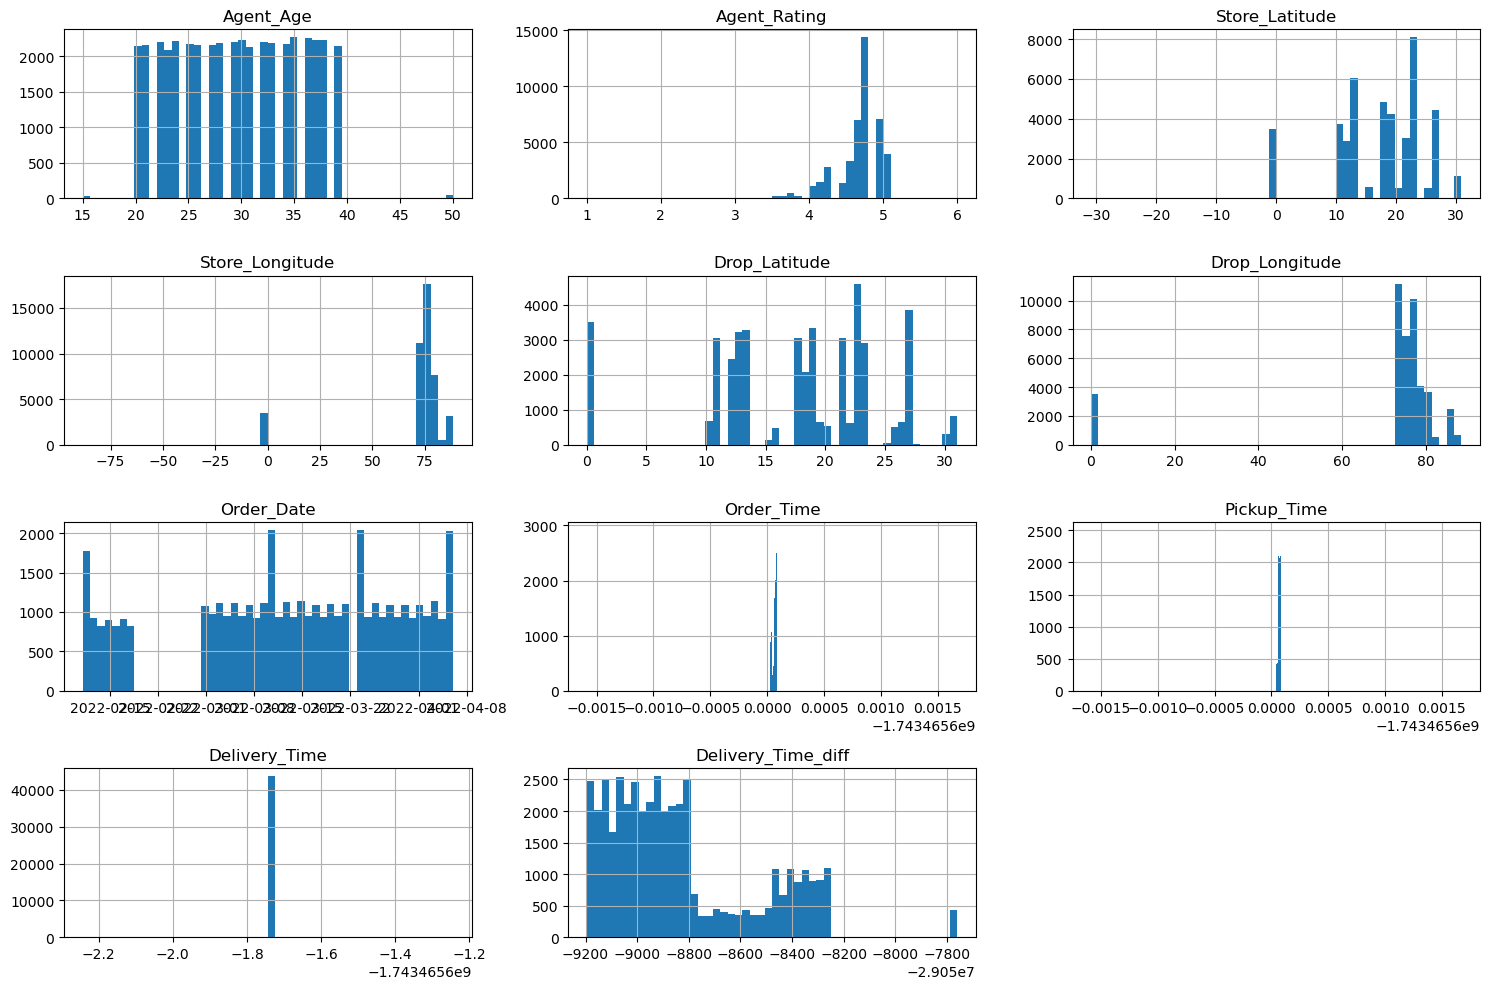

In [65]:
# Plot histograms for numeric columns
df_encoded.hist(bins=50, figsize=(15, 10))
plt.tight_layout()
plt.show()


In [67]:
summary_report = """
Summary Report for Dataset:

1. Basic Information:
- Number of rows: {0}
- Number of columns: {1}
- Columns: {2}

2. Missing Data:
{3}

3. Descriptive Statistics:
{4}

4. Correlations:
{5}

5. Categorical Data Summary:
{6}
""".format(
    df_encoded.shape[0],
    df_encoded.shape[1],
    df_encoded.columns.tolist(),
    missing_data.to_string(),
    df_encoded.describe().to_string(),
    correlation_summary.to_string(),
    "\n".join([f"{col}:\n{df_encoded[col].value_counts().to_string()}" for col in categorical_columns])
)

# Print or save the summary report
print(summary_report)



Summary Report for Dataset:

1. Basic Information:
- Number of rows: 43739
- Number of columns: 44
- Columns: ['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date', 'Order_Time', 'Pickup_Time', 'Delivery_Time', 'Delivery_Time_diff', 'Area_Other', 'Area_Semi-Urban ', 'Area_Urban ', 'Category_Books', 'Category_Clothing', 'Category_Cosmetics', 'Category_Electronics', 'Category_Grocery', 'Category_Home', 'Category_Jewelry', 'Category_Kitchen', 'Category_Outdoors', 'Category_Pet Supplies', 'Category_Shoes', 'Category_Skincare', 'Category_Snacks', 'Category_Sports', 'Category_Toys', 'Weather_Cloudy_True', 'Weather_Fog_True', 'Weather_Sandstorms_True', 'Weather_Stormy_True', 'Weather_Sunny_True', 'Weather_Windy_True', 'Traffic_High_True', 'Traffic_Jam_True', 'Traffic_Low_True', 'Traffic_Medium_True', 'Traffic_NaN_True', 'Vehicle_bicycle_True', 'Vehicle_motorcycle_True', 'Vehicle_scooter_True', 'Vehicle_van_True']

2. Missing Data:


In [3]:
import pandas as pd

# Assume `df_encoded` is your correlation dataframe
# Filter to avoid self-correlation (i.e., correlation of a variable with itself)
threshold = 0.5  # Set the threshold for "strong" correlations

# Iterate over the upper triangle of the matrix to avoid duplicate pairs
for i in range(len(df_encoded.columns)):
    for j in range(i+1, len(df_encoded.columns)):
        var1 = df_encoded.columns[i]
        var2 = df_encoded.columns[j]
        corr_value = df_encoded.iloc[i, j]

        if pd.notnull(corr_value):
            if corr_value >= threshold:
                print(f"There is a strong positive correlation ({corr_value:.2f}) between {var1} and {var2}.")
            elif corr_value <= -threshold:
                print(f"There is a strong negative correlation ({corr_value:.2f}) between {var1} and {var2}.")
            elif abs(corr_value) >= 0.3:
                print(f"There is a moderate correlation ({corr_value:.2f}) between {var1} and {var2}.")
            elif abs(corr_value) >= 0.1:
                print(f"There is a weak correlation ({corr_value:.2f}) between {var1} and {var2}.")


NameError: name 'df_encoded' is not defined